In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from bandit import Bandit


N_bandits = 10
bandits = [Bandit() for _ in range(N_bandits)]
rewards = [[b.generate_reward() for _ in range(2000)] for b in bandits]

Text(0, 0.5, 'Sample rewards')

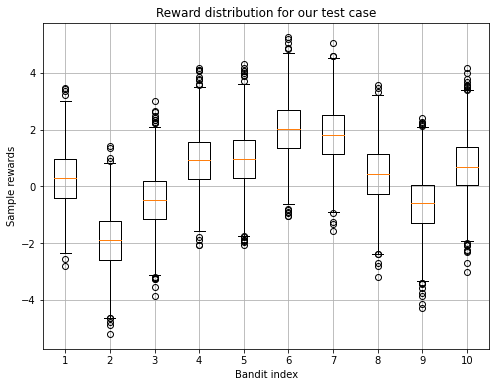

In [3]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.title("Reward distribution for our test case")
plt.boxplot(rewards)
plt.grid()
plt.xlabel("Bandit index")
plt.ylabel("Sample rewards")

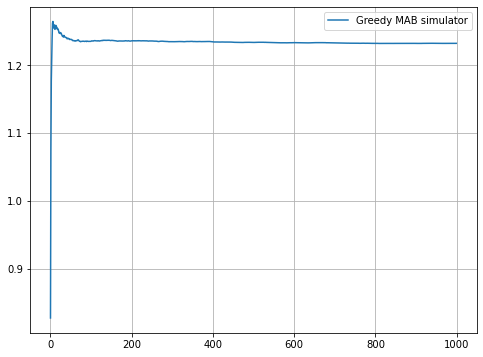

In [4]:
from simulator import GreedyMABSimulator


sim = GreedyMABSimulator(bandits)
all_rewards = sim.simulate_multiple_runs(num_runs=2000)

plt.figure(figsize=(8, 6))
plt.plot(all_rewards, label="Greedy MAB simulator")
plt.grid()
plt.legend()

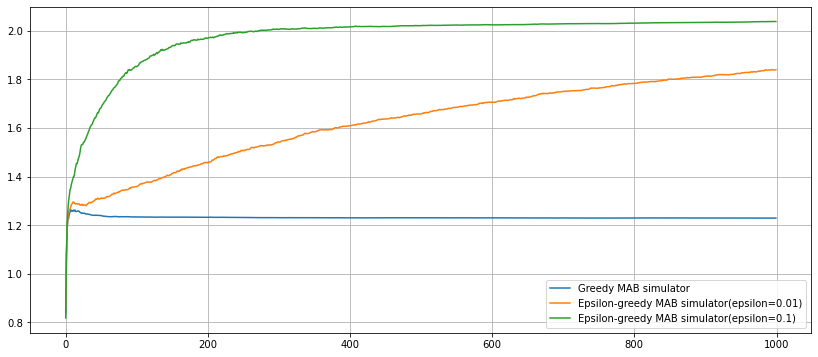

In [5]:
from simulator import EpsilonGreedyMABSimulator


sims = [
    GreedyMABSimulator(bandits),
    EpsilonGreedyMABSimulator(bandits, 0.01),
    EpsilonGreedyMABSimulator(bandits, 0.1),
]

plt.figure(figsize=(14, 6))
for sim in sims:
    plt.plot(sim.simulate_multiple_runs(num_runs=2000), label=sim)
plt.legend()
plt.grid()